<a href="https://colab.research.google.com/github/paninishah/synapse-learning-phase/blob/week4/Panini_SynapseLP_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4**

## **DJS Synapse Learning Period**
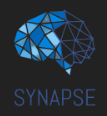

Congratulations on making it this far!! Welcome to the world of classification where we move on from unsupervised to helping the algorithms by telling them exactly what the data we're feeding them is. This week we'll be looking into  many algorithms such as Decision Trees, SVC, Naive Bayes, Random Forest and so on. We'll also be delving into hyperparameter tuning the only place where ched chaad can lead to a good result.

**Warning: This task contains many theory questions. Proceed with caution!**

Jk, make sure you research well and make sure you are understanding the models y'all are implementing as that will make your concepts much stronger and build a strong ML foundation which will be very useful as we move further with the tasks.

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

## Importing the dataset

Use this link to download the adult income dataset and upload it to your drive.

https://drive.google.com/file/d/1VAE1qF16D-sKnBOWXzGXVNGhtNZNLFQS/view?usp=sharing

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Mounted at /content/drive


In [3]:
#import your dataset here
df = pd.read_csv('/content/drive/MyDrive/synapse/task4/adult_income_dataset.csv')

## Dealing with Nan values

In [4]:
#write a code to find the nan values for the dataset and make a decision on whether to dropna or fill na
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isna().sum()
#no of nan rows in each case are less than 10%, so we can drop

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [8]:
df = df.dropna()

In [9]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [10]:
df.shape

(30162, 15)

## Object Valued Columns

For Relationship, Race and Sex find out the max division average fnlwgt for each unique value.

In [11]:
#Write your code here
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
#for relationship
df.groupby('relationship')['fnlwgt'].mean().sort_values(ascending=False)

,fnlwgt
relationship,
Other-relative,206017.299213
Own-child,193500.518361
Not-in-family,191680.809345
Unmarried,190790.042030
Husband,186819.673754
Wife,181480.642248


In [13]:
#for race
df.groupby('race')['fnlwgt'].mean().sort_values(ascending=False)

,fnlwgt
race,
Black,228807.455449
Other,195772.238095
White,187285.002159
Asian-Pac-Islander,159337.400000
Amer-Indian-Eskimo,123491.944056


In [14]:
#for sex
df.groupby('sex')['fnlwgt'].mean().sort_values(ascending=False)

,fnlwgt
sex,
Male,191650.246075
Female,185926.150480


## Getting rid of unnecessary columns

*   Drop the education num column since we already have their education in the form of categories
*   Check the combinations of the marital-status and relationship column, see if we need both of them or just marital status will work too.


In [15]:
#write your code here
df = df.drop('education', axis=1)
##but if we were going to encode data anyway, why didnt we keep num?

In [16]:
df.groupby(['marital-status', 'relationship']).size()
##i dont get what the columns mean
##marital status doesn't uniquely determine the relationship, so we cant drop relationship
##but i dont get why it's necessary so im dropping it
df = df.drop('relationship', axis=1)

## Dealing with Categorical Data
As you probably know by now, the ML models dont know how to deal with String or object type data... so your mission shall you choose to accept it (don't really have much of a choice) is to find out which columns to do one hot encoding on and which columns to do Label Encoding on.

**Hint: Since Marital-status has less number of columns (distinct values na), One Hot encode it**

In [17]:
#Write your code here
df.info()
##workclass, marital status, occupation, relationship, race, sex, native-country, income
#Hint: Check which needs one hot encoding which needs label encoding
#Then perform necessary transformations (Feel free to add more coding cells)

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education-num   30162 non-null  int64 
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   race            30162 non-null  object
 7   sex             30162 non-null  object
 8   capital-gain    30162 non-null  int64 
 9   capital-loss    30162 non-null  int64 
 10  hours-per-week  30162 non-null  int64 
 11  native-country  30162 non-null  object
 12  income          30162 non-null  object
dtypes: int64(6), object(7)
memory usage: 3.2+ MB


In [18]:
##list of unique values in each object column
for col in df.columns:
  if df[col].dtype == 'object':
    print(col, df[col].unique())


workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
race ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex ['Male' 'Female']
native-country ['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Poland'
 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan' 'Haiti'
 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France' 'Guatemala'
 'Italy' 'China' 'South' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicara

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

cols_to_ohe = ['workclass', 'marital-status', 'occupation', 'race', 'sex']

df = pd.get_dummies(df, columns=cols_to_ohe)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   age                                   30162 non-null  int64 
 1   fnlwgt                                30162 non-null  int64 
 2   education-num                         30162 non-null  int64 
 3   capital-gain                          30162 non-null  int64 
 4   capital-loss                          30162 non-null  int64 
 5   hours-per-week                        30162 non-null  int64 
 6   native-country                        30162 non-null  object
 7   income                                30162 non-null  object
 8   workclass_Federal-gov                 30162 non-null  bool  
 9   workclass_Local-gov                   30162 non-null  bool  
 10  workclass_Private                     30162 non-null  bool  
 11  workclass_Self-emp-inc           

In [21]:
##what do to with native country?
##unique values in native country
df['native-country'].unique()
##too many values, label encode native country

df['native-country'] = LabelEncoder().fit_transform(df['native-country'])

## Altering the Target Column
Modify the Target Column (income) to make sure that all the values which are <=50K are replaced with a 0 and the values >50K are replaced with a 1.

In [22]:
#write your code here
##i can just label encode right?

le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])

##df['income'] = df['income'].map({'<=50K':0, '>50K':1})
##or i could also use apply, and then lambda


In [23]:
##verifying
df['income'].unique()

array([0, 1])

In [24]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

**Extract the target column(income) and store it in a seperate variable and remove it from the original dataset. Additionally, do a 70:30 Train Test Split**

In [25]:
#write your code here
y = df['income']
X = df.drop('income', axis=1)
##iloc = index based selection, can do that too


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Chalo now that we have the preprocessed data we can feed it into the models. Lets start with some basic ones.

# Logistic Regression
*   Theory:https://www.youtube.com/watch?v=yIYKR4sgzI8&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe
*   Implementation: https://www.youtube.com/watch?v=n40hS9tQmcY


Explain the algorithm, its working and its use cases.

*logistic regression predicts whether something is true or false, instead of predicting continuous data.*

*it's mainly used in classification. it fits an S-shaped curve to data. it can work with continuous or discrete data*

In [35]:
#import the model and apply it to the data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [36]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'], 'C': [1,2,3,4,5,6,10,20,30,40,50], 'max_iter': [100,200,300]}


In [37]:
classifier_regressor = GridSearchCV(classifier, param_grid=parameter, scoring='accuracy', cv=5)

In [48]:
#classifier_regressor.fit(X_train, y_train)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
print(classifier_regressor.best_params_)

{'C': 40, 'max_iter': 300, 'penalty': 'l2'}


In [40]:
print(classifier_regressor.best_score_)
#this is very very bad isnt it?

0.7943453845552423


In [42]:
y_pred = classifier_regressor.predict(X_test)

In [51]:
y_pred_2 = classifier.predict(X_test)

Find the accuracy and confusion matrix for the same and explain what it shows.

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
score = accuracy_score(y_test, y_pred)
print(score)
#why is it so bad?????

0.7828489335838215


In [46]:
print(confusion_matrix(y_test, y_pred))

[[6408  359]
 [1606  676]]


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      6767
           1       0.65      0.30      0.41      2282

    accuracy                           0.78      9049
   macro avg       0.73      0.62      0.64      9049
weighted avg       0.76      0.78      0.75      9049



In [54]:
##without gridsearchcv
score_2 = accuracy_score(y_test, y_pred_2)
print(score_2)
##why is it worseee

0.779423140678528


In [53]:
print(confusion_matrix(y_test, y_pred_2))

[[6424  343]
 [1653  629]]


### Now that you have printed a confusion matrix and classification report. Let's see what you have understood from it. Write a short paragraph highlighting what you understoood from it below.

the confusion matrix tells me that there were 359 false negatives and 1606 false positives

the classification report shows that my positive predictions were 76 percent accurate, i caught 78 percent of accurate cases, and 75 percent of positive predictions were correct.

now, idk if this is actually good accuracy for this dataset, or if i trained it wrong, but my accuracy seems pretty bad

# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [57]:
#import the model from sklearn and apply it to your data
##i have to use multinomial here
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

model.fit(X_train, y_train)
# Make predictions
y_pred_nb = model.predict(X_test)
# Calculate accuracy
accuracy_score(y_test, y_pred_nb)

0.7717979887280363

In [58]:
model.score(X_test, y_test)
#ok so it's the same thing

0.7717979887280363

In [59]:
#tryin gaussian
from sklearn.naive_bayes import GaussianNB
model_2 = GaussianNB()

model_2.fit(X_train, y_train)
# Make predictions
y_pred_nb_2 = model_2.predict(X_test)
# Calculate accuracy
accuracy_score(y_test, y_pred_nb_2)
##only a bit more accurate

0.7867167642833462

# Decision Tree Classifier
* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

In [30]:
#import the decision tree from sklearn and run it on your data


<b>Print the Model Accuracy</b>

## Explain: What are the differences in the working of Logistic Regression, Naive Bayes and Decision Tree and explain why are the accuracies are different.

Ans:

### Mention some real life use cases for each of these three models:

Ans:

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

In [31]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)


In [32]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz #(ur model name, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

Error: dot: can't open tree.dot


FileNotFoundError: [Errno 2] No such file or directory: 'tree.png'

<b>print the test accuracy and train accuracy here</b>

In [ ]:
#write code here


### Explain the different hyperparameters you changed and how did it affect the models. Also give a summary of the graphs you made.

Ans:

## SUPPORT VECTOR MACHINE (SVM)

Theory : https://www.youtube.com/watch?v=efR1C6CvhmE (Part 1)

Theory: https://www.youtube.com/watch?v=H9yACitf-KM

Maths Intuition : https://www.youtube.com/watch?v=Js3GLb1xPhc

EXTRAS:

https://www.youtube.com/watch?v=NDqACjz5j8g

If you are more curious and want to explore :

https://www.youtube.com/watch?v=Toet3EiSFcM (Part 2)

https://www.youtube.com/watch?v=efR1C6CvhmE&t=432s (Part 3)

https://www.youtube.com/watch?v=8bFKyb77vp0




In [ ]:
#Now that we know SVM is sensitive to feature scales, so standardize (don't forget to standardise your X_test):


In [ ]:
#Train your model


In [ ]:
#Predict and check accuracies


In [ ]:
#let's try out using different kernels now. Freedom to choose lies in your hands. EXPLOREEE!


## BIAS AND VARIANCE
### Hurrayy! You have made it so far sane.

### Before moving forward let's first understand what exactly do you mean by bias and variance.

THEORY: https://www.geeksforgeeks.org/machine-learning/bias-vs-variance-in-machine-learning/ (explained in quite detail do read this not just video)

VIDEO: https://www.youtube.com/watch?v=EuBBz3bI-aA


## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [ ]:
#implement Random forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier


# Train the model


# Make predictions on the test data

# Evaluate the model's performance


# Optional: Generate a classification report for more details


In [ ]:
#find the accuracy


### Explain the difference between random forest and decision tree. Also think of cases where the outputs for both of them can be same if its possible.

Ans :

In [ ]:
#write a code to implement BaggingClassifier


# Initialize the base estimator (e.g., Decision Tree)

# Initialize the BaggingClassifier


# Train the Bagging model

# Make predictions on the test data

# Evaluate the model's performance


# Optional: Generate a classification report for more details


### Explain how are Bagging and Random Forest different and why do we do bagging?


Ans :

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
*   Theory:https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [ ]:
#write code here

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

#yk the drill now


Just to make things more interesting implement XGBoost as well and compare its accuracy with that of AdaBoost :)

In [ ]:
!pip install xgboost
import xgboost as xgb


### Explain: What is the difference between Adaboost and XGBoost. Also describe in what cases is XGBoost better to use than AdaBoost.

Ans :

## Explain: What is the difference between Bagging and Boosting? Explain with examples

Ans:








### 3. Pruning Techniques



*   Theory: https://opendatascience.com/what-is-pruning-in-machine-learning/
*   Theory:https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107



In [ ]:
#implement pruning


In [ ]:
#before plotting a tree you will need to first convert your X_train and X_test to DataFrame (Explain WHY (Hint: You made one tree before and it worked fine so it has to do with something you did after..Explore))
#Code to convert it here:




In [ ]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique


<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

As a brush up on data visualisation... make a graph to compare the accuracies you achieved for each of the models you trained and explain which one is the best to perform classification tasks and why?

In [ ]:
#write your code here


# **RESEARCH TASK**

Ensemble Models are not only used for classification but also for Regression.Research on the various regression models such as XGBoost Regressor and Random Forest regressor and how are they different from the Linear Regression model we made in Task 2. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2025 - 2026